In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

path=r'/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df.2'
print(path)
df=pd.read_csv(path, index_col=False)

/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df.2


Key Questions				
What is the age distribution of policyholders?				
What are the gender ratios among policyholders?				
What is the geographic distribution of policyholders?				
Are there any patterns or anomalies in the insurance cost?				
What is the average cost of different types of claims per certain demographics?				

In [158]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [159]:
df= df.drop(['Unnamed: 0'], axis=1)

# Demographic Flags

In [160]:
df.columns

Index(['age', 'sex', 'bmi', 'number_of_children', 'smoker', 'region',
       'annual_insurance_cost', 'cost_category'],
      dtype='object')

Age Category

In [161]:
# In the previous analysis, it was determined that the correlation between age and cost of insurance was the strongest out of all other relationsips
# But it is still a weak correlation because the r value is so low
# To gather a better idea of the distribution of this relationship a age flag is to be created
# Technically those over the age of 65 are considered to be seniors but the data set does not have record of anyone over the age of 65

df.loc[df['age'] < 30, 'age_category']='young adulthood'
df.loc[(df['age'] >=30) & (df['age'] <45), 'age_category']= 'middle age adulthood'
df.loc[df['age'] >=45, 'age_category']='late adulthood'

In [162]:
df['age_category'].value_counts()

late adulthood          529
young adulthood         416
middle age adulthood    392
Name: age_category, dtype: int64

BMI Category

In [163]:
# BMI categories are based on the CDC 

df.loc[df['bmi'] <18.5, 'bmi_category']= 'underweight'
df.loc[(df['bmi'] >=18.5) & (df['bmi'] <24.9), 'bmi_category']= 'healthy weight'
df.loc[(df['bmi'] >=24.9) & (df['bmi']<30), 'bmi_category']= 'overweight'
df.loc[df['bmi'] >= 30, 'bmi_category'] = 'obesity'

In [164]:
df['bmi_category'].value_counts()

obesity           706
overweight        389
healthy weight    222
underweight        20
Name: bmi_category, dtype: int64

# Age Distribution

In [165]:
df.columns

Index(['age', 'sex', 'bmi', 'number_of_children', 'smoker', 'region',
       'annual_insurance_cost', 'cost_category', 'age_category',
       'bmi_category'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

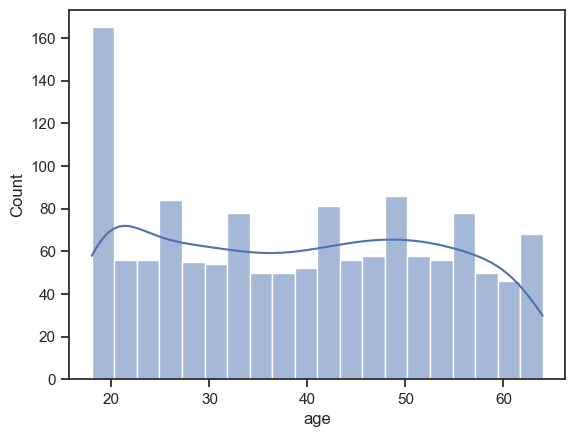

In [166]:
# There are far more record of people younger than 20 in this data set
# other ages have a more even distribution 

sns.histplot(df['age'], bins = 20, kde = True)

<Axes: xlabel='age_category', ylabel='Count'>

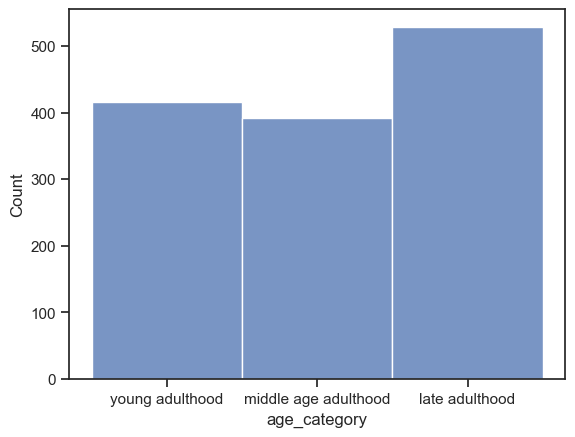

In [167]:
#Using categories, there are higher counts of people in their late adulthood within the data set
#The age category by itself would not be enough to conduct a cost analysis because it is not statistically significant 

sns.histplot(df['age_category'], bins = 20)

In [168]:
df.groupby('age_category').cost_category.value_counts()

age_category          cost_category
late adulthood        Mid Cost         296
                      High Cost        139
                      Low Cost          94
middle age adulthood  Low Cost         280
                      High Cost        103
                      Mid Cost           9
young adulthood       Low Cost         295
                      High Cost         92
                      Mid Cost          29
Name: cost_category, dtype: int64

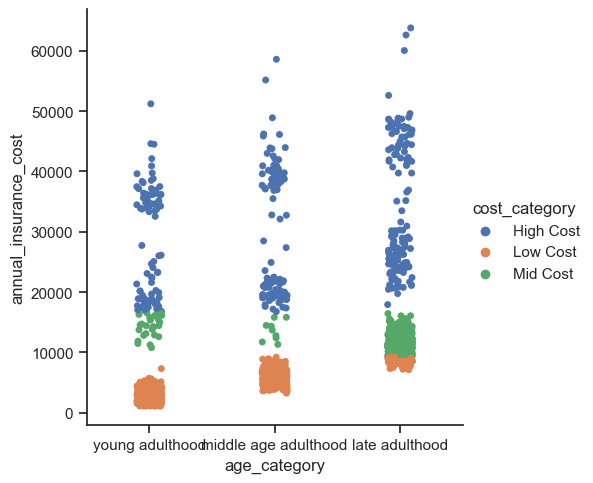

In [169]:
sns.set(style = "ticks")
g = sns.catplot(x = 'age_category', y = 'annual_insurance_cost', hue = 'cost_category', data = df)

Text(0.5, 1.0, 'Trends for Age and Cost')

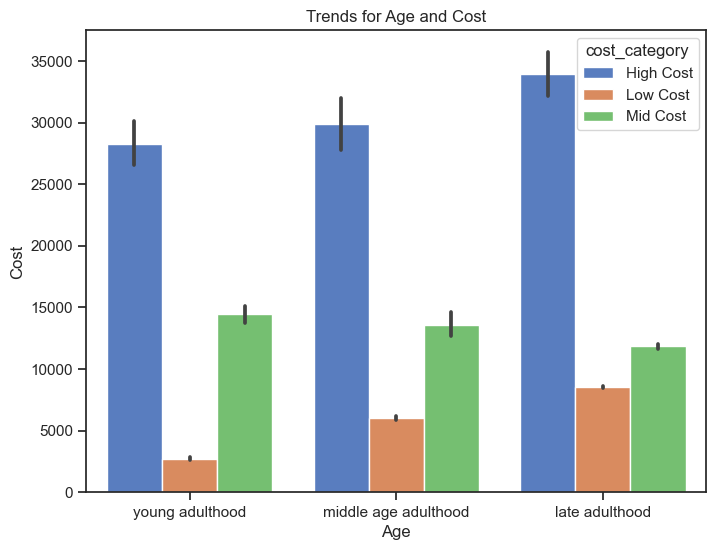

In [170]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'age_category', y = 'annual_insurance_cost', hue = 'cost_category', data = df, palette = 'muted')

plt.xlabel('Age')
plt.ylabel('Cost')
plt.title('Trends for Age and Cost')


<Axes: xlabel='age_category,smoker'>

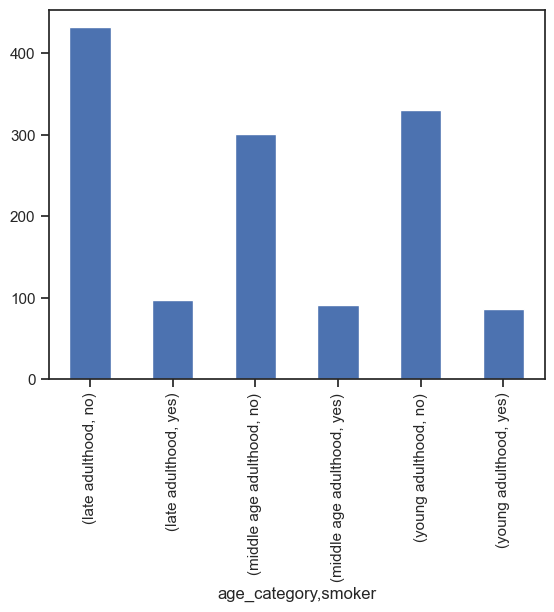

In [171]:
age_smoker_grouped=df.groupby(['age_category'])['smoker'].value_counts()
age_smoker_grouped.plot.bar()

<Axes: xlabel='age_category,bmi_category'>

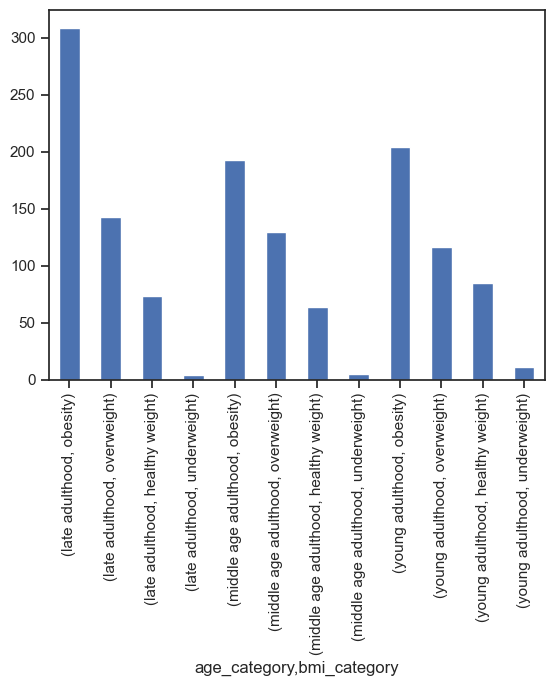

In [172]:
age_BMI_grouped=df.groupby(['age_category'])['bmi_category'].value_counts()
age_BMI_grouped.plot.bar()

<Axes: xlabel='age_category,number_of_children'>

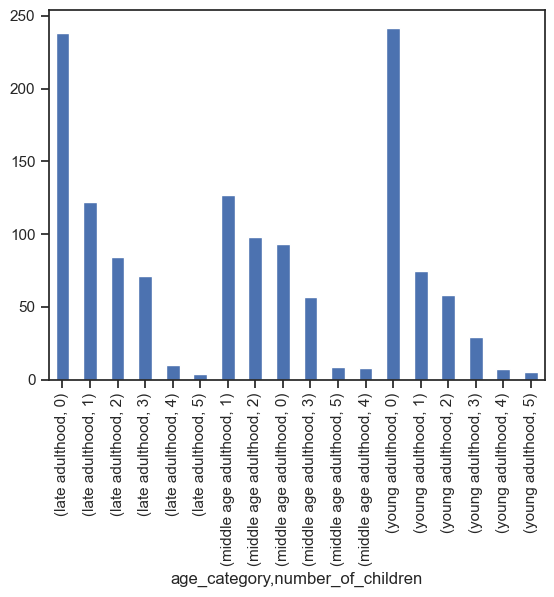

In [173]:
age_kids_grouped=df.groupby(['age_category'])['number_of_children'].value_counts()
age_kids_grouped.plot.bar()

# Gender Ratios

In [174]:
df.columns

Index(['age', 'sex', 'bmi', 'number_of_children', 'smoker', 'region',
       'annual_insurance_cost', 'cost_category', 'age_category',
       'bmi_category'],
      dtype='object')

Text(0.5, 1.0, 'Trends for Gender and Cost')

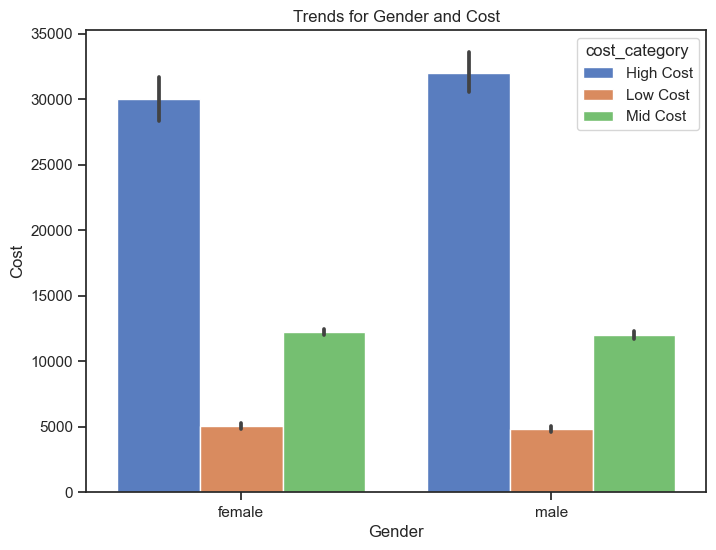

In [175]:
# Investigates any trends gender and insurance cost 

plt.figure(figsize = (8, 6))
sns.barplot(x = 'sex', y = 'annual_insurance_cost', hue = 'cost_category', data = df, palette = 'muted')

plt.xlabel('Gender')
plt.ylabel('Cost')
plt.title('Trends for Gender and Cost')

Text(0.5, 1.0, 'Trends for Gender and BMI')

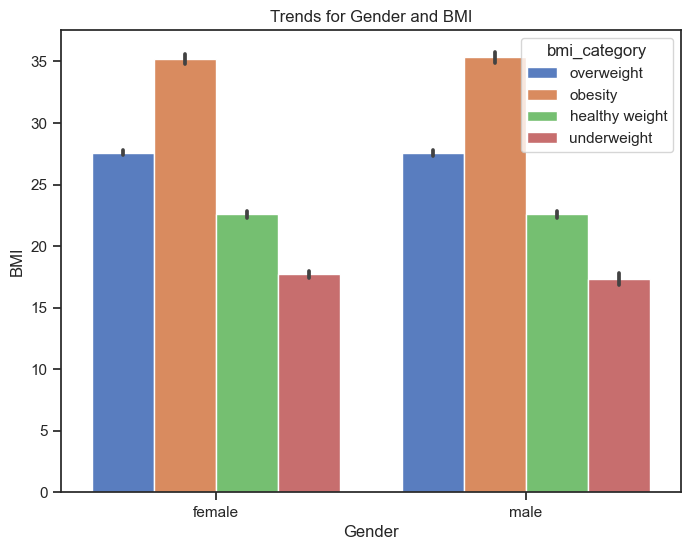

In [176]:
#investigate any trends with gender and bmi

plt.figure(figsize = (8, 6))
sns.barplot(x = 'sex', y = 'bmi', hue = 'bmi_category', data = df, palette = 'muted')

plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Trends for Gender and BMI')

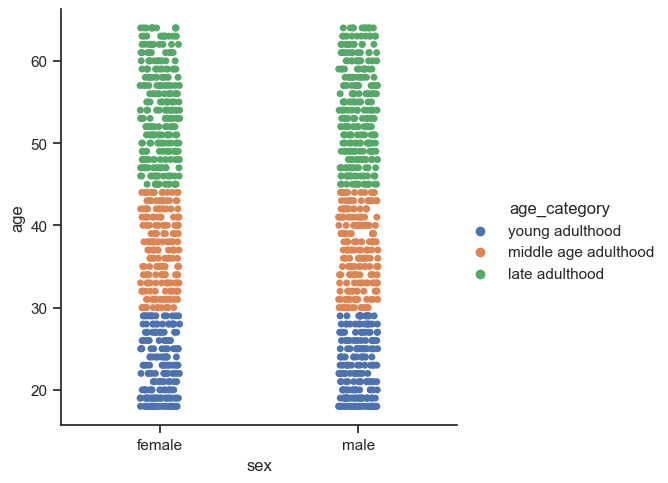

In [177]:
#chart the count of gender and their ages

sns.set(style = "ticks")
g = sns.catplot(x = "sex", y = "age", hue = "age_category", data = df)

In [178]:
#investigate trends for prevalence of smokers per gender 

smoker_gender_grouped = df.groupby(['sex'])['smoker'].value_counts()
print(smoker_gender_grouped)

sex     smoker
female  no        547
        yes       115
male    no        516
        yes       159
Name: smoker, dtype: int64


<Axes: xlabel='sex,smoker'>

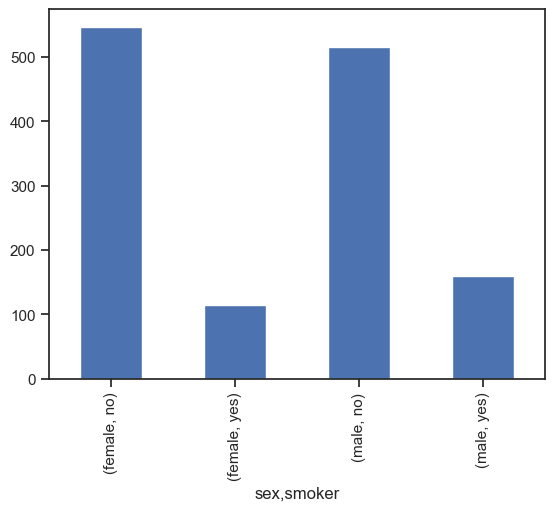

In [179]:
smoker_gender_grouped.plot.bar()

# Insurance Cost Per Demographics

In [180]:
df.columns

Index(['age', 'sex', 'bmi', 'number_of_children', 'smoker', 'region',
       'annual_insurance_cost', 'cost_category', 'age_category',
       'bmi_category'],
      dtype='object')

Demographic: Gender and BMI

In [181]:
#There is no clear pattern in terms of BMI and, gender, and cost

i=df.groupby(['sex', 'bmi_category'])['cost_category'].value_counts()
top_five = i.nlargest(5)
top_five_high = i.xs('High Cost', level='cost_category').nlargest(5)
top_five_low = i.xs('Low Cost', level='cost_category').nlargest(5)

print(top_five, top_five_high, top_five_low)

sex     bmi_category  cost_category
male    obesity       Low Cost         173
female  obesity       Low Cost         154
male    obesity       High Cost        115
female  overweight    Low Cost         112
        obesity       Mid Cost         104
Name: cost_category, dtype: int64 sex     bmi_category  
male    obesity           115
female  obesity            76
male    overweight         51
female  overweight         42
        healthy weight     26
Name: cost_category, dtype: int64 sex     bmi_category  
male    obesity           173
female  obesity           154
        overweight        112
male    overweight         98
        healthy weight     62
Name: cost_category, dtype: int64


Demographic: smoker, gender, bmi, age category 

In [182]:
#gender does not play a significat role in driving up the cost
#this makes sense because in the gender data analyses there were a proportional amounts of users with a certain gender within each category 
#There is a trend where smokers places in the top five for paying high costs
#There are no late adults within the top five of paying lost cost insurance

i = df.groupby(['sex', 'bmi_category', 'smoker', 'age_category'])['cost_category'].value_counts()
top_five = i.nlargest(5)
top_five_high_cost = i.xs('High Cost', level='cost_category').nlargest(5)
top_five_low_cost = i.xs('Low Cost', level='cost_category').nlargest(5)

print(top_five, top_five_high_cost, top_five_low_cost)

sex     bmi_category  smoker  age_category          cost_category
female  obesity       no      late adulthood        Mid Cost         100
male    obesity       no      late adulthood        Mid Cost          79
                              young adulthood       Low Cost          71
female  obesity       no      young adulthood       Low Cost          70
male    obesity       no      middle age adulthood  Low Cost          69
Name: cost_category, dtype: int64 sex     bmi_category  smoker  age_category        
male    obesity       yes     late adulthood          36
                              young adulthood         30
                              middle age adulthood    27
female  obesity       yes     late adulthood          19
                              middle age adulthood    18
Name: cost_category, dtype: int64 sex     bmi_category  smoker  age_category        
male    obesity       no      young adulthood         71
female  obesity       no      young adulthood         70


Demographic: Smoker and number of children 

In [183]:
#Most people in the data set have no children, but those with one child have the high count of paying the most/least
#this may indicate bias in the data collection
#smokers tend to pay higher insurance

i = df.groupby(['smoker', 'number_of_children'])['cost_category'].value_counts()
top_five = i.nlargest(5)
top_five_high_cost = i.xs('High Cost', level='cost_category').nlargest(5)
top_five_low_cost = i.xs('Low Cost', level='cost_category').nlargest(5)

print(top_five, top_five_high_cost, top_five_low_cost)

smoker  number_of_children  cost_category
no      0                   Low Cost         278
        1                   Low Cost         183
        0                   Mid Cost         153
        2                   Low Cost         121
yes     0                   High Cost        102
Name: cost_category, dtype: int64 smoker  number_of_children
yes     0                     102
        1                      58
        2                      52
        3                      38
no      0                      27
Name: cost_category, dtype: int64 smoker  number_of_children
no      0                     278
        1                     183
        2                     121
        3                      67
        5                      12
Name: cost_category, dtype: int64


Demographic: smoker and age 

In [184]:
i = df.groupby(['smoker', 'age_category'])['cost_category'].value_counts()
top_five = i.nlargest(5)
top_five_high_cost = i.xs('High Cost', level='cost_category').nlargest(5)
top_five_low_cost = i.xs('Low Cost', level='cost_category').nlargest(5)

print(top_five, top_five_high_cost, top_five_low_cost)

smoker  age_category          cost_category
no      late adulthood        Mid Cost         296
        young adulthood       Low Cost         295
        middle age adulthood  Low Cost         280
yes     late adulthood        High Cost         97
no      late adulthood        Low Cost          94
Name: cost_category, dtype: int64 smoker  age_category        
yes     late adulthood          97
        middle age adulthood    90
        young adulthood         67
no      late adulthood          42
        young adulthood         25
Name: cost_category, dtype: int64 smoker  age_category        
no      young adulthood         295
        middle age adulthood    280
        late adulthood           94
Name: cost_category, dtype: int64


Demographic: Smoker and BMI

<Axes: xlabel='smoker,bmi_category'>

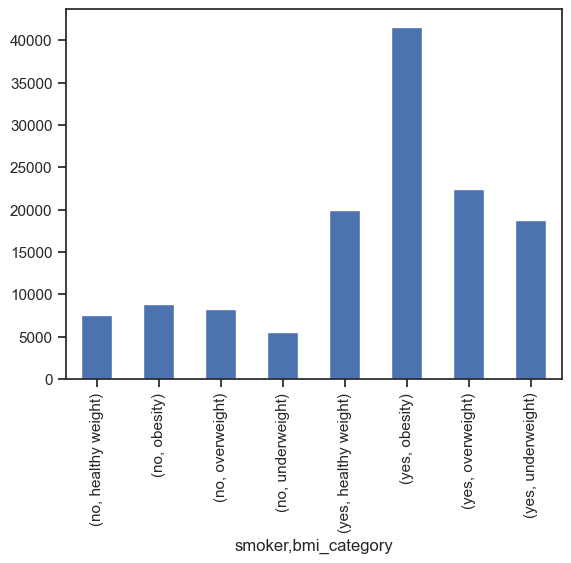

In [185]:
#There is a trend where if the person is a smoker and is obese then they are likely to pay a higher average of insurance
i=df.groupby(['smoker', 'bmi_category'])['annual_insurance_cost'].mean()

i.plot.bar()

Demographic: smoker and age

<Axes: xlabel='smoker,age_category'>

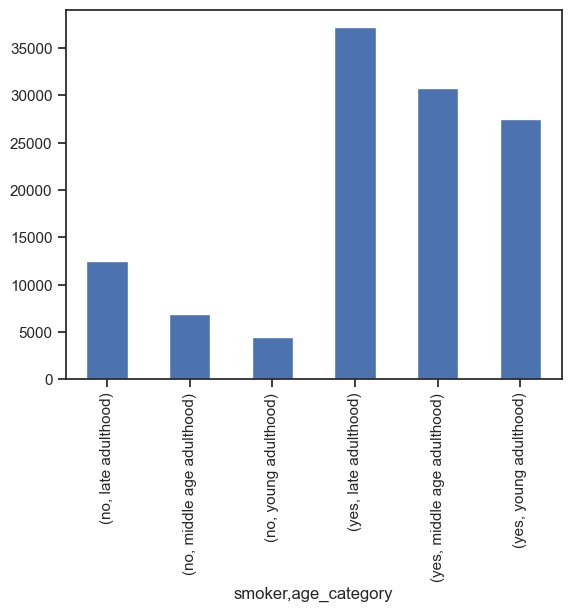

In [186]:
#there are more users who are smokers and older that tend to pay more

i = df.groupby(['smoker', 'age_category'])['annual_insurance_cost'].mean()
i.plot.bar()

Demographic: Smoker, Age, and BMI

In [187]:
#Older adults who smoke and are obese are categorized in the high cost profile

i = df.groupby(['smoker', 'bmi_category','age_category'])['cost_category'].value_counts()
top_five = i.nlargest(5)
top_five_high_cost = i.xs('High Cost', level='cost_category').nlargest(5)
top_five_low_cost = i.xs('Low Cost', level='cost_category').nlargest(5)

print(top_five, top_five_high_cost, top_five_low_cost)

smoker  bmi_category  age_category          cost_category
no      obesity       late adulthood        Mid Cost         179
                      young adulthood       Low Cost         141
                      middle age adulthood  Low Cost         136
        overweight    middle age adulthood  Low Cost         100
                      young adulthood       Low Cost          82
Name: cost_category, dtype: int64 smoker  bmi_category  age_category        
yes     obesity       late adulthood          55
                      middle age adulthood    45
                      young adulthood         45
        overweight    late adulthood          26
no      obesity       late adulthood          25
Name: cost_category, dtype: int64 smoker  bmi_category    age_category        
no      obesity         young adulthood         141
                        middle age adulthood    136
        overweight      middle age adulthood    100
                        young adulthood          82
        

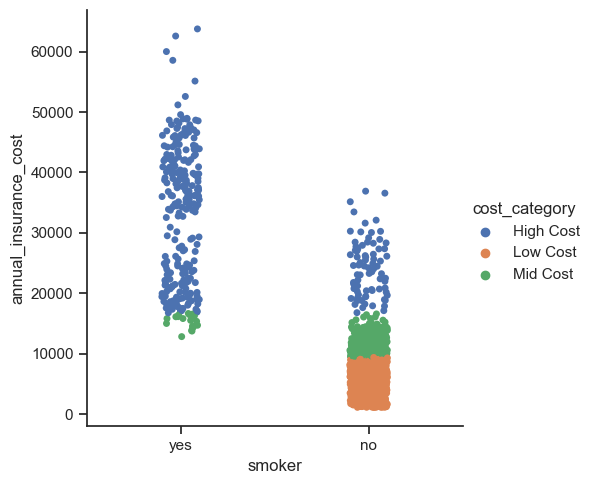

In [188]:
# The key finding is that smokers tends to have higher costs of insurance regarless of other characterisitcs they may have
# Being obese and being older as well as a smoker tends to result in paying a higher rate
sns.set(style="ticks")
g = sns.catplot(x="smoker", y="annual_insurance_cost", hue="cost_category", data=df)

In [189]:
df.to_csv(os.path.join('/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data','df.3'))